In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import scipy.stats as stat

In [2]:
df=pd.read_csv(r"C:\Users\samee\Downloads\Churn_Modelling1.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [3]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [4]:
df["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [5]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [6]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9946 non-null   object 
 6   Age              9700 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender              54
Age                300
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9700.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.939897,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.500497,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Surname', 'Geography', 'Gender']
Numerical columns : ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


# data CLeaning

In [11]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender              54
Age                300
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [12]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'gender' and 'age'

# Handling missing values for 'gender' and 'age' columns
# For 'gender', one approach is to impute the missing values with the mode (most frequently occurring value)
# For 'age', one approach is to impute the missing values with the mean or median age

# Assuming df is your DataFrame
# Filling missing values in 'gender' with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Filling missing values in 'age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
df.duplicated().unique()

array([False])

In [15]:
df.drop('RowNumber',axis=1,inplace=True)

In [16]:
df.drop('Surname',axis=1,inplace=True)

In [17]:
df.drop('CustomerId',axis=1,inplace=True)

In [18]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [20]:
df['Age'].unique()

array([42., 41., 39., 43., 44., 50., 29., 27., 31., 24., 34., 25., 35.,
       45., 58., 32., 38., 46., 36., 33., 40., 51., 61., 49., 37., 19.,
       66., 56., 26., 21., 55., 75., 22., 30., 28., 65., 48., 52., 57.,
       73., 23., 47., 54., 60., 59., 62., 53., 70., 63., 72., 64., 67.,
       18., 82., 69., 74., 71., 20., 76., 68., 77., 88., 85., 84., 79.,
       80., 78., 81., 92., 83.])

# handling outliers

(array([ 597., 2108., 3806., 1818.,  812.,  510.,  202.,  125.,   18.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

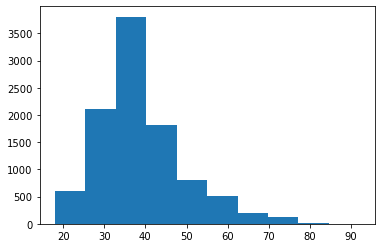

In [21]:
plt.hist('Age',data=df) 

<AxesSubplot:>

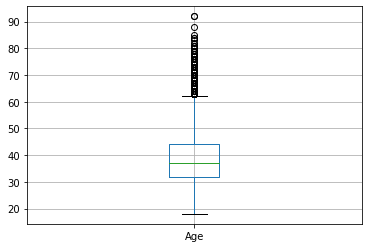

In [22]:
df.boxplot(column=['Age'])

In [23]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print('IQR',IQR)

# Calculating the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 
print('Lower Bound :',round(lower_bound))
print('Upper Bound :',round(upper_bound))
 
# Drop the outliers
df = df[(df['Age'] >= lower_bound) 
                & (df['Age'] <= upper_bound)]

IQR 12.0
Lower Bound : 14
Upper Bound : 62


In [24]:
df['Age'].unique()

array([42., 41., 39., 43., 44., 50., 29., 27., 31., 24., 34., 25., 35.,
       45., 58., 32., 38., 46., 36., 33., 40., 51., 61., 49., 37., 19.,
       56., 26., 21., 55., 22., 30., 28., 48., 52., 57., 23., 47., 54.,
       60., 59., 62., 53., 18., 20.])

<AxesSubplot:>

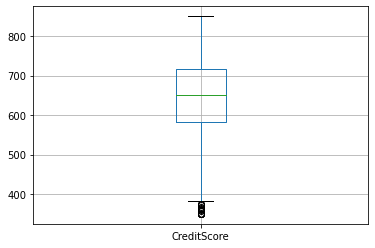

In [25]:
df.boxplot(column=['CreditScore'])

(array([  19.,  160.,  436.,  919., 1406., 1803., 1875., 1475.,  929.,
         629.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

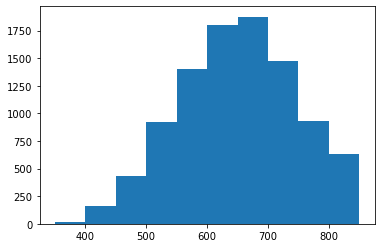

In [26]:
plt.hist(df['CreditScore'])

In [27]:
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

# Calculating the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 
print('Lower Bound :',round(lower_bound))
print('Upper Bound :',round(upper_bound))
 
# Drop the outliers
df = df[(df['CreditScore'] >= lower_bound) 
                & (df['CreditScore'] <= upper_bound)]

Lower Bound : 382
Upper Bound : 918


In [28]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [29]:
df['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 501, 684, 528, 497, 476, 549,
       635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756, 571,
       574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472, 465,
       556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601, 656,
       725, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675, 738, 813,
       657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506, 493, 750,
       729, 646, 647, 808, 524, 769, 730, 515, 773, 814, 710, 413, 623,
       622, 785, 605, 479, 685, 538, 562, 721, 628, 668, 828, 674, 625,
       432, 770, 758, 795, 686, 789, 589, 461, 584, 579, 663, 682, 793,
       691, 485, 650, 754, 535, 716, 539, 706, 586, 631, 717, 800, 683,
       704, 615, 667, 484, 480, 578, 512, 606, 597, 778, 514, 525, 715,
       580, 807, 521, 759, 516, 711, 618, 643, 671, 689, 620, 676, 572,
       695, 592, 567, 670, 694, 547, 594, 673, 610, 767, 763, 712, 703,
       662, 659, 523, 772, 545, 634, 739, 771, 681, 544, 696, 76

<AxesSubplot:>

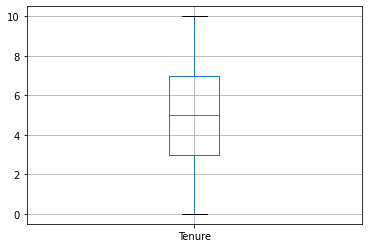

In [30]:
df.boxplot(column=['Tenure'])

<AxesSubplot:>

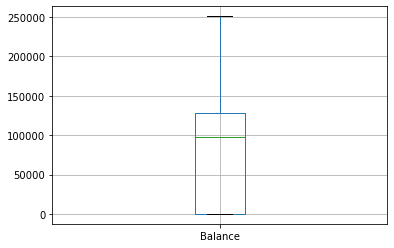

In [31]:
df.boxplot(column=['Balance'])

(array([3.491e+03, 6.400e+01, 3.460e+02, 1.132e+03, 2.010e+03, 1.679e+03,
        7.040e+02, 1.790e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

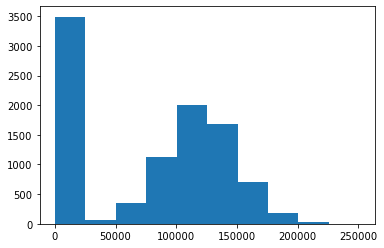

In [32]:
plt.hist('Balance',data=df)

<AxesSubplot:>

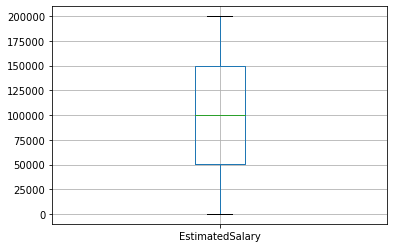

In [33]:
df.boxplot(column=['EstimatedSalary'])

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

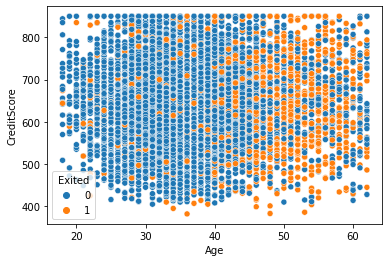

In [34]:
sns.scatterplot(x=df['Age'],y=df['CreditScore'],hue=df['Exited'])

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

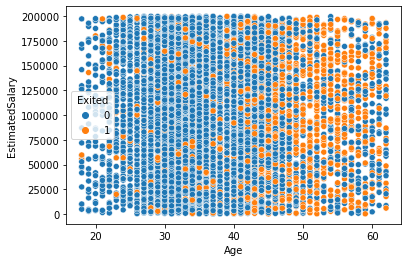

In [35]:
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],hue=df['Exited'])

(array([  66.,  269.,  630., 1050., 1458., 1751., 1733., 1301.,  795.,
         584.]),
 array([382. , 428.8, 475.6, 522.4, 569.2, 616. , 662.8, 709.6, 756.4,
        803.2, 850. ]),
 <BarContainer object of 10 artists>)

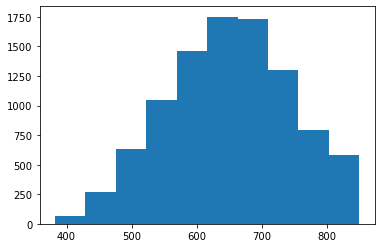

In [36]:
#Univariate Analysis
plt.hist(df['CreditScore'])

(array([3.491e+03, 6.400e+01, 3.460e+02, 1.132e+03, 2.010e+03, 1.679e+03,
        7.040e+02, 1.790e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

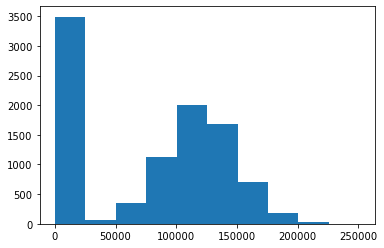

In [37]:
plt.hist(df['Balance'])

(array([ 221.,  566., 1509., 1719., 2074., 1624.,  774.,  561.,  302.,
         287.]),
 array([18. , 22.4, 26.8, 31.2, 35.6, 40. , 44.4, 48.8, 53.2, 57.6, 62. ]),
 <BarContainer object of 10 artists>)

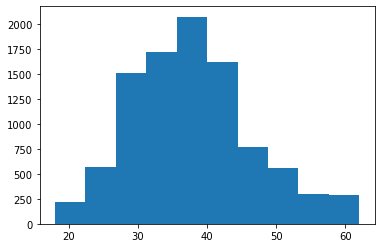

In [38]:
plt.hist(df['Age'])

Through Histogram we can see that data is right skewed.!

# Visualizing categorical Variable

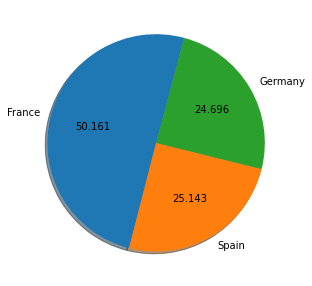

In [39]:
plt.figure(figsize=(5,5))
plt.pie(df['Geography'].value_counts(),startangle=75,autopct='%.3f',labels=['France', 'Spain', 'Germany'],shadow=True)
plt.show()

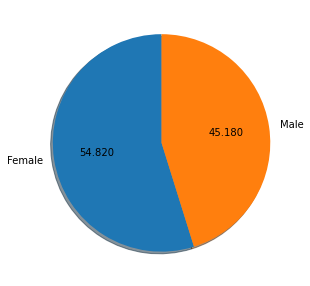

In [40]:
plt.figure(figsize=(5,5))
plt.pie(df['Gender'].value_counts(),startangle=90,autopct='%.3f',labels=['Female', 'Male'],shadow=True)
plt.show()

## BIVARIATE ANALYSIS

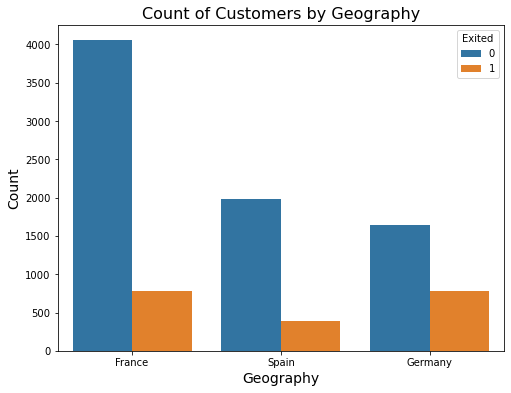

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Geography',hue='Exited')
plt.title('Count of Customers by Geography', fontsize=16)
plt.xlabel('Geography', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

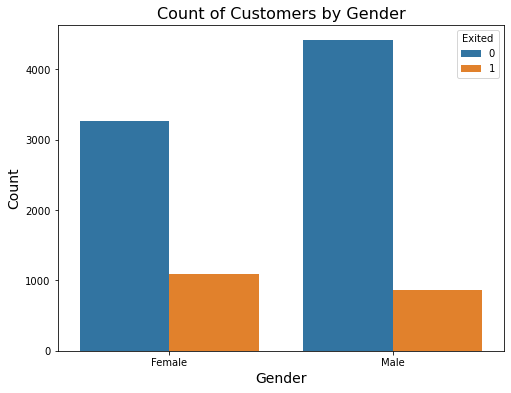

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender',hue='Exited')
plt.title('Count of Customers by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

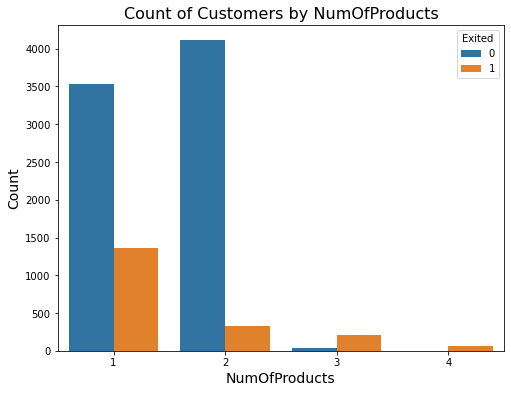

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='NumOfProducts',hue='Exited')
plt.title('Count of Customers by NumOfProducts', fontsize=16)
plt.xlabel('NumOfProducts', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

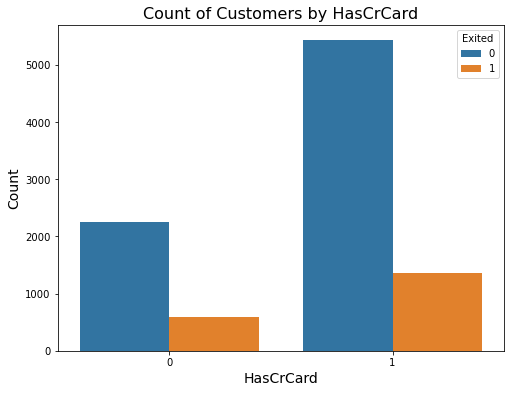

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='HasCrCard',hue='Exited')
plt.title('Count of Customers by HasCrCard', fontsize=16)
plt.xlabel('HasCrCard', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

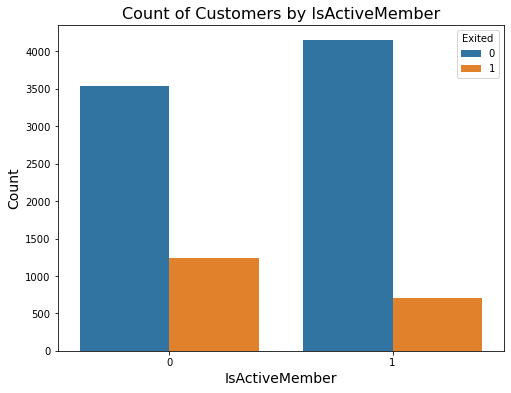

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='IsActiveMember',hue='Exited')
plt.title('Count of Customers by IsActiveMember', fontsize=16)
plt.xlabel('IsActiveMember', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [46]:
#category vs category
#pd.crosstab(dd.categ_x, dd.categ_y, margins=True,values=dd.cust,aggfunc=pd.Series.count)
pd.crosstab(df['Geography'],df['Gender'],margins=True,values=df['Exited'],aggfunc=pd.Series.count)

Gender,Female,Male,All
Geography,,,
France,2161,2673,4834
Germany,1152,1271,2423
Spain,1041,1339,2380
All,4354,5283,9637


In [47]:
#The aggfunc parameter allows you to specify how the values in the resulting crosstab table should be aggregated. Some common aggregation functions include:

#count: Counts the occurrences of each combination of categories.

#sum: Calculates the sum of values at each combination of categories.

#mean: Computes the mean (average) of values at each combination of categories.

#median: Computes the median of values at each combination of categories.

#min: Finds the minimum value among values at each combination of categories.

#max: Finds the maximum value among values at each combination of categories.

#std: Computes the standard deviation of values at each combination of categories.

#var: Calculates the variance of values at each combination of categories.

#lambda function or custom function: You can also use a lambda function or custom-defined function to perform a specific aggregation.

In [48]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Geography', 'Gender']
Numerical columns : ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [49]:

# Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the list of categorical features
print("Categorical Features:")
print(categorical_features)


Categorical Features:
['Geography', 'Gender']


<AxesSubplot:xlabel='Geography', ylabel='CreditScore'>

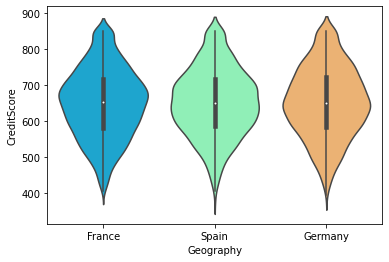

In [50]:
sns.violinplot(x="Geography", y="CreditScore", data=df,palette='rainbow')

<AxesSubplot:xlabel='Geography', ylabel='CreditScore'>

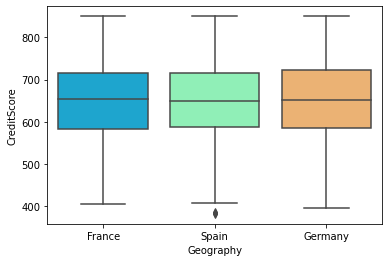

In [51]:
sns.boxplot(x='Geography',y='CreditScore',data=df,palette='rainbow')

<AxesSubplot:xlabel='Gender', ylabel='CreditScore'>

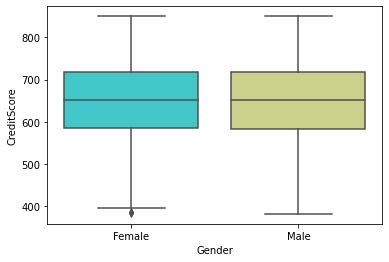

In [52]:
sns.boxplot(x='Gender',y='CreditScore',data=df,palette='rainbow')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

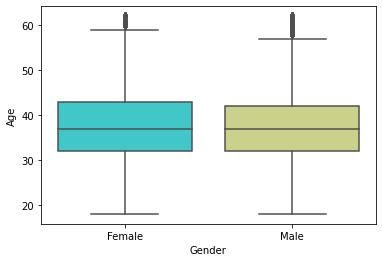

In [53]:
sns.boxplot(x='Gender',y='Age',data=df,palette='rainbow')

In [54]:
oldest_people = df.sort_values(by='Age', ascending=False)
oldest_people

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3719,850,France,Female,62.0,1,124678.35,1,1,0,70916.00,1
5996,638,Germany,Male,62.0,4,108716.59,2,1,1,74241.09,0
3008,779,France,Male,62.0,10,119096.55,1,0,1,116977.89,0
3403,624,France,Female,62.0,7,125163.62,2,1,1,151411.50,0
5368,538,France,Female,62.0,3,75051.49,1,0,0,17682.02,1
...,...,...,...,...,...,...,...,...,...,...,...
8522,644,Spain,Male,18.0,8,0.00,2,1,0,59172.42,0
1619,656,France,Male,18.0,10,151762.74,1,0,1,127014.32,0
3512,806,Spain,Male,18.0,3,0.00,2,1,1,86994.54,0
3517,771,Spain,Male,18.0,1,0.00,2,0,0,41542.95,0


<AxesSubplot:xlabel='Geography', ylabel='Age'>

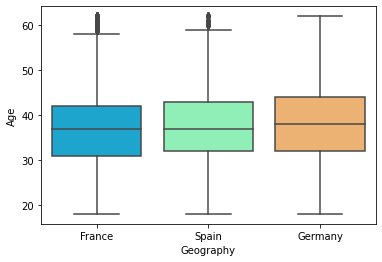

In [55]:
sns.boxplot(x='Geography',y='Age',data=df,palette='rainbow')

<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

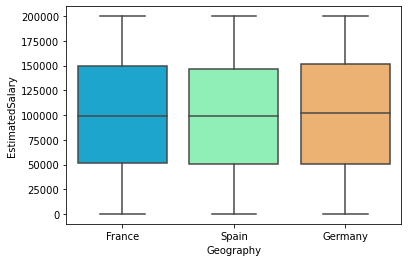

In [56]:
sns.boxplot(x='Geography',y='EstimatedSalary',data=df,palette='rainbow')

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

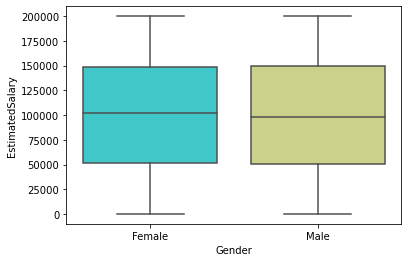

In [57]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=df,palette='rainbow')

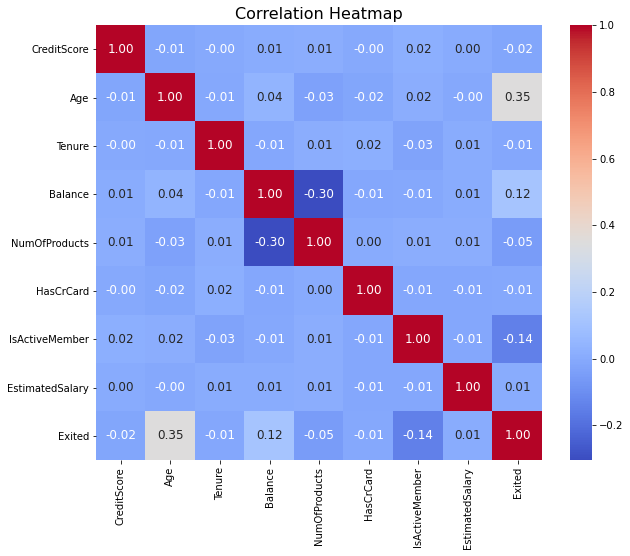

In [58]:
#to checck cat vs cat bivariate analysis
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


<AxesSubplot:xlabel='Gender', ylabel='CreditScore'>

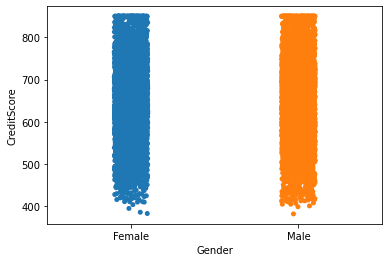

In [59]:
sns.stripplot(x="Gender", y="CreditScore", data=df)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Gender'>

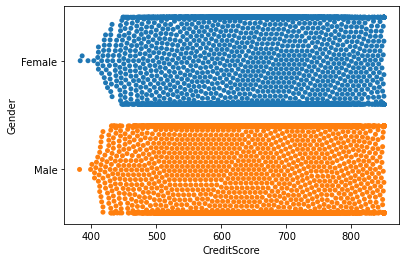

In [60]:
sns.swarmplot(x="CreditScore", y="Gender", data=df)

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

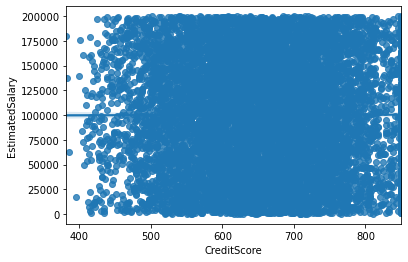

In [61]:
sns.regplot(x='CreditScore',y='EstimatedSalary',data=df)

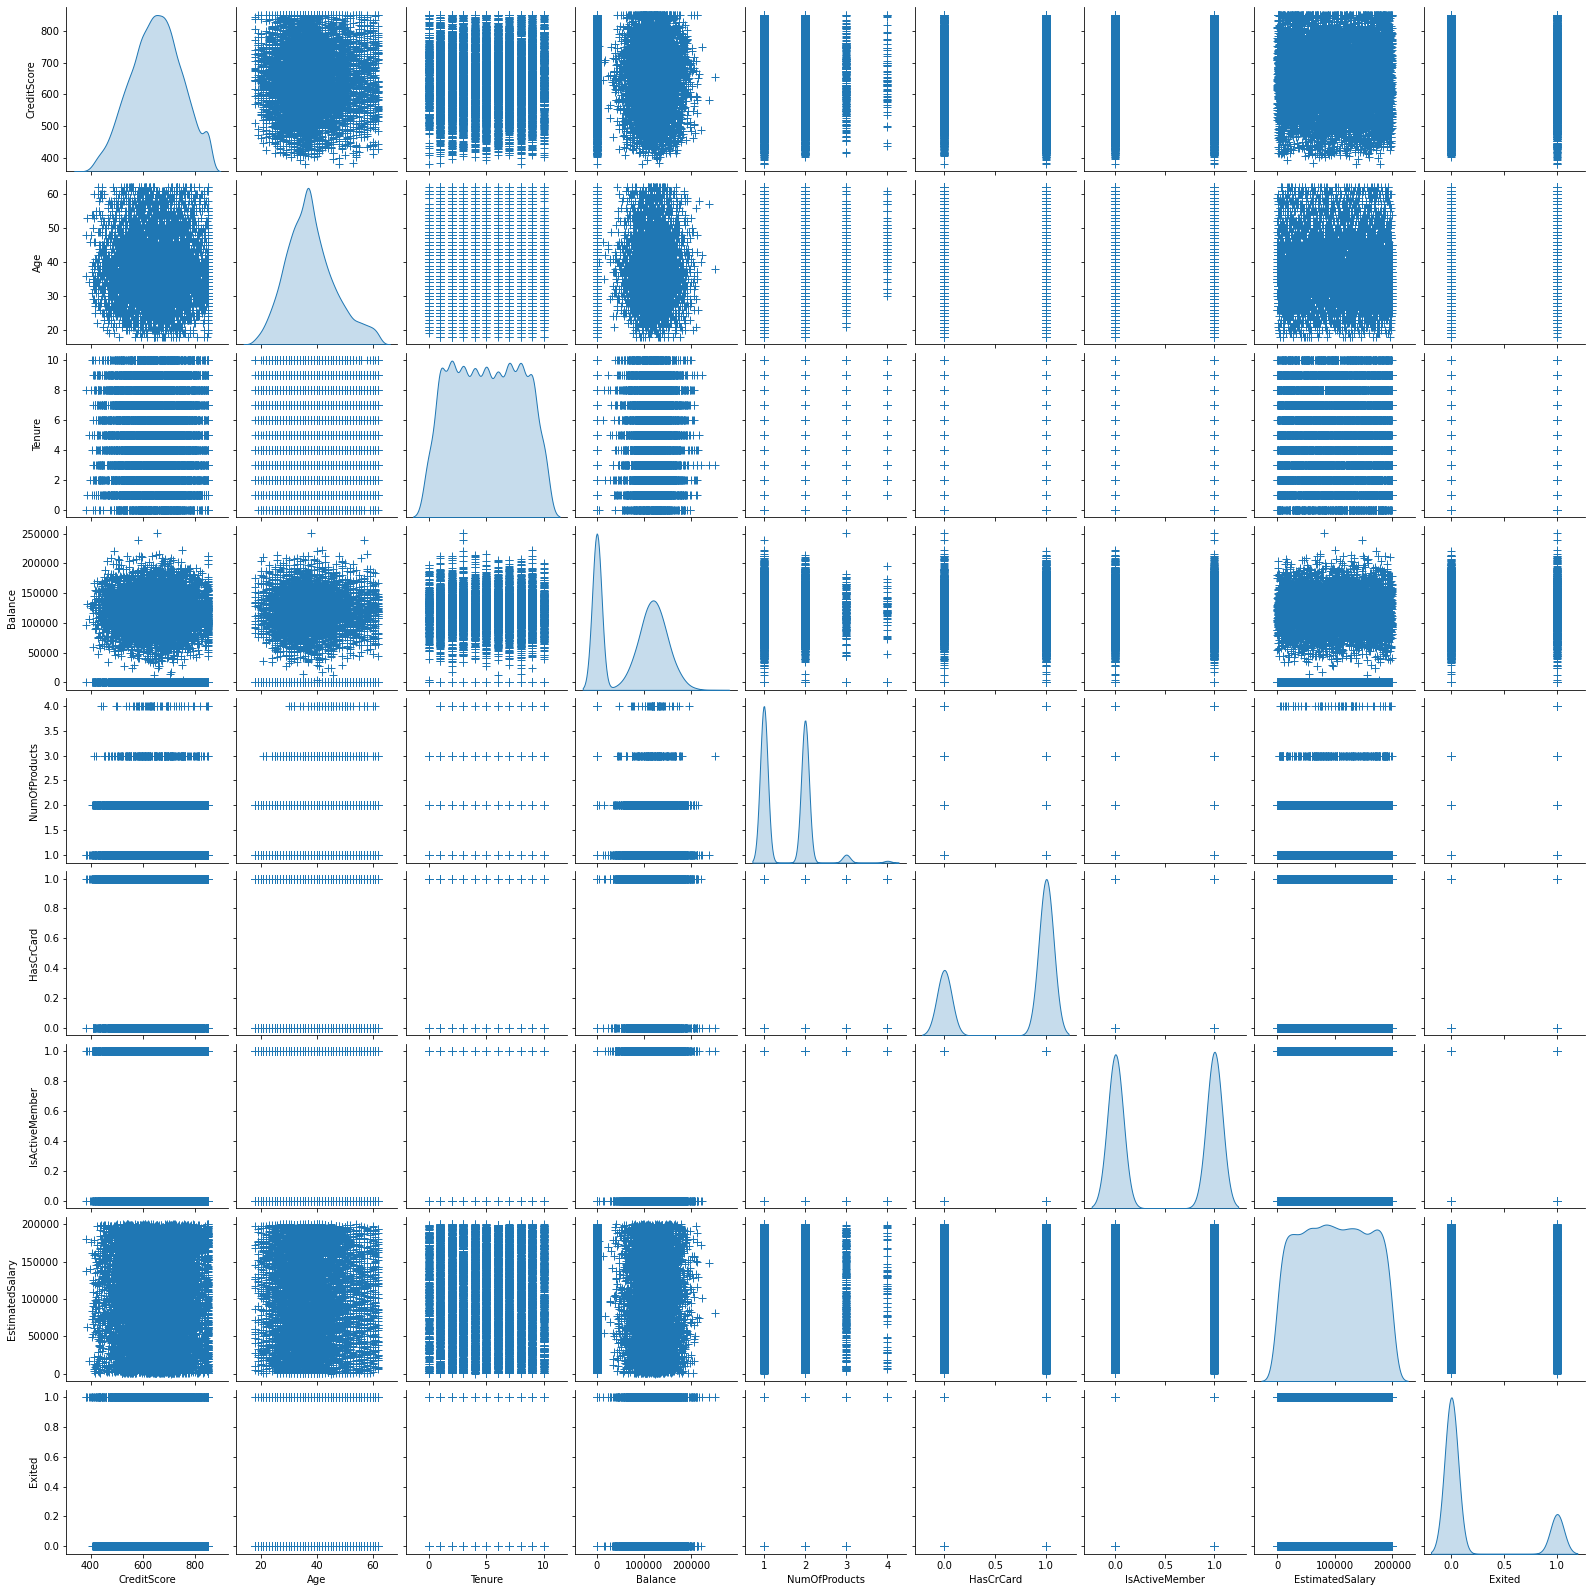

In [62]:
g = sns.pairplot(df, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))


In [63]:
# Data scaling and Transformation

In [64]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [65]:
# Applying one-hot encoding to the 'Geography' feature
df = pd.get_dummies(df, columns=['Geography'])

# Displaying the encoded DataFrame
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42.0,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39.0,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39.0,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35.0,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36.0,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42.0,3,75075.31,2,1,0,92888.52,1,0,1,0


In [66]:
from sklearn.preprocessing import LabelEncoder
# Creating a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Gender' column
df['Gender_LabelEncoded'] = label_encoder.fit_transform(df['Gender'])

# Display the modified DataFrame
df.head()

#0 for female and 1 for male

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_LabelEncoded
0,619,Female,42.0,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,Female,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,Female,39.0,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1,0


In [67]:
#df.drop('Gender',axis=1,inplace=True) 

In [68]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_LabelEncoded
0,619,Female,42.0,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,Female,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,Female,39.0,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39.0,5,0.00,2,1,0,96270.64,0,1,0,0,1
9996,516,Male,35.0,10,57369.61,1,1,1,101699.77,0,1,0,0,1
9997,709,Female,36.0,7,0.00,1,0,1,42085.58,1,1,0,0,0
9998,772,Male,42.0,3,75075.31,2,1,0,92888.52,1,0,1,0,1


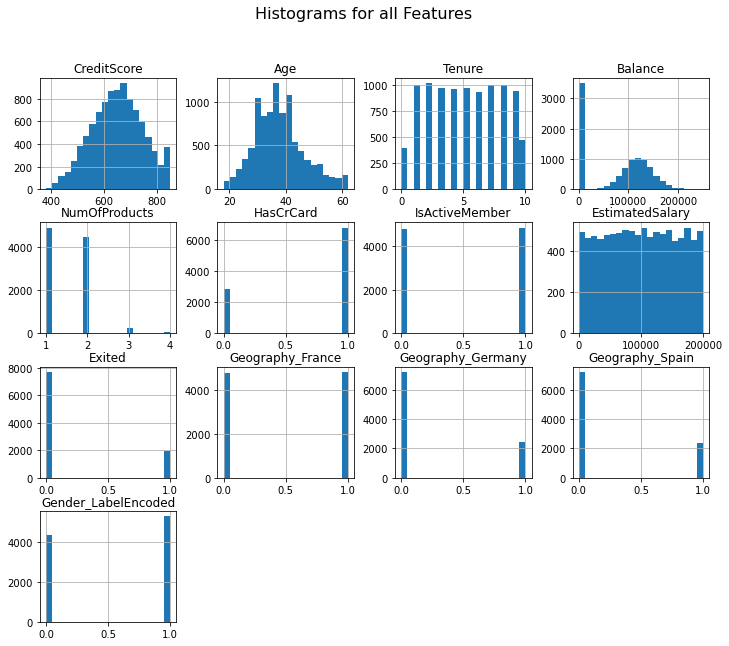

In [69]:
# Creating histograms for all features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms for all Features', fontsize=16)
plt.show()

In [70]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    


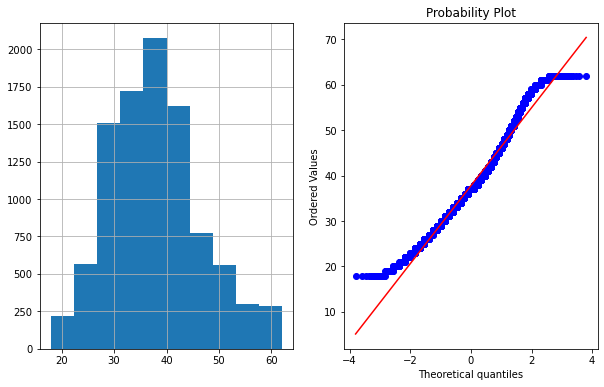

In [71]:
plot_data(df,'Age')

In [72]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_LabelEncoded
0,619,Female,42.0,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,Female,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,Female,39.0,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39.0,5,0.00,2,1,0,96270.64,0,1,0,0,1
9996,516,Male,35.0,10,57369.61,1,1,1,101699.77,0,1,0,0,1
9997,709,Female,36.0,7,0.00,1,0,1,42085.58,1,1,0,0,0
9998,772,Male,42.0,3,75075.31,2,1,0,92888.52,1,0,1,0,1


In [73]:
df['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

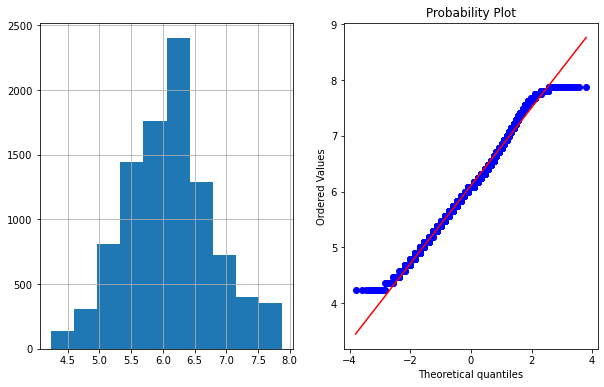

In [74]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

In [75]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [76]:
print(parameters)

0.21480937094693162


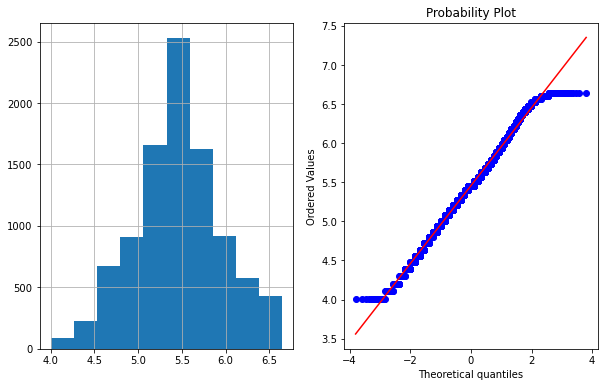

In [77]:
plot_data(df,'Age_Boxcox')

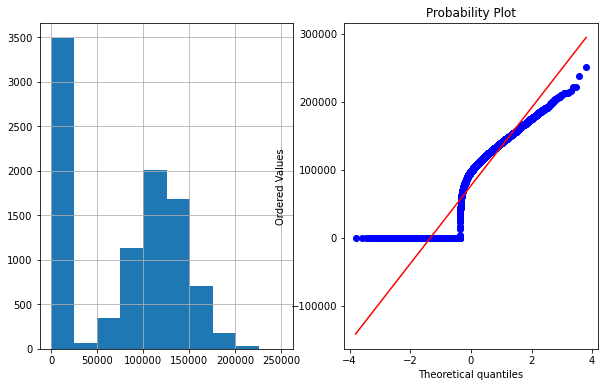

In [78]:
df['Balance_Square']=df.Balance**(1/2)
plot_data(df,'Balance')

In [79]:
# boxcox cannot be applied on balance because it contains zero value it should have positive value for box cox transformation

In [80]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_LabelEncoded,Age_sqaure,Age_Boxcox,Balance_Square
0,619,Female,42.0,2,0.00,1,1,1,101348.88,1,1,0,0,0,6.480741,5.735197,0.000000
1,608,Female,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1,0,6.403124,5.681551,289.495872
2,502,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,0,0,0,6.480741,5.735197,399.575775
3,699,Female,39.0,1,0.00,2,0,0,93826.63,0,1,0,0,0,6.244998,5.571100,0.000000
4,850,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1,0,6.557439,5.787850,354.275063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39.0,5,0.00,2,1,0,96270.64,0,1,0,0,1,6.244998,5.571100,0.000000
9996,516,Male,35.0,10,57369.61,1,1,1,101699.77,0,1,0,0,1,5.916080,5.336126,239.519540
9997,709,Female,36.0,7,0.00,1,0,1,42085.58,1,1,0,0,0,6.000000,5.396771,0.000000
9998,772,Male,42.0,3,75075.31,2,1,0,92888.52,1,0,1,0,1,6.480741,5.735197,273.998741


In [81]:
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
#plt.subplot(1,2,1)
#The first argument, 1, indicates the total number of rows in the grid.
#The second argument, 2, indicates the total number of columns in the grid.
#The third argument, 2, indicates the position of the subplot within the grid.
#In this case, plt.subplot(1, 2, 2) creates the second subplot in a 1x2 grid. 
#This means that there are two subplots in total, arranged horizontally. 
#The subplot is positioned at the second place in the grid.


#By setting plot=pylab, you're instructing the function to use the plotting capabilities provided by the pylab module, 
#which is a convenient and straightforward way to visualize the probability plot.

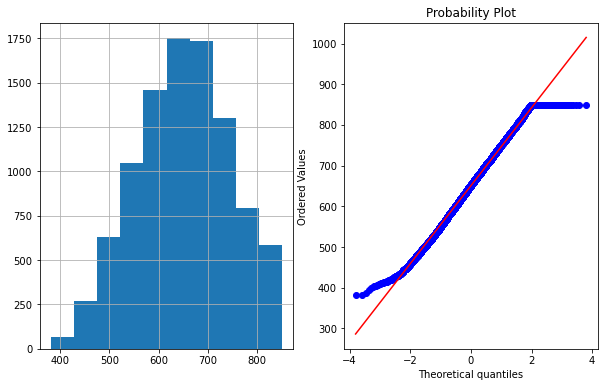

In [82]:
plot_data(df,'CreditScore')

In [83]:
df.drop('Gender',axis=1,inplace=True)

In [84]:
from sklearn.preprocessing import MinMaxScaler
 
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
 
# Numerical columns
num_col_ = [col for col in df.columns if df[col].dtype != 'object']
df = df
# learning the statistical parameters for each of the data and transforming
df[num_col_] = scaler.fit_transform(df[num_col_])
df.tail()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_LabelEncoded,Age_sqaure,Age_Boxcox,Balance_Square
9995,0.831197,0.477273,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,1.0,0.0,0.0,1.0,0.551406,0.593744,0.000000
9996,0.286325,0.386364,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,1.0,0.0,0.0,1.0,0.460829,0.504593,0.478181
9997,0.698718,0.409091,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,1.0,0.0,0.0,0.0,0.483939,0.527602,0.000000
9998,0.833333,0.545455,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0,0.0,1.0,0.616324,0.656003,0.547016
9999,0.876068,0.227273,0.4,0.518708,0.000000,1.0,0.0,0.190914,0.0,1.0,0.0,0.0,0.0,0.288834,0.327174,0.720214


(array([ 140.,  307.,  812., 1443., 1758., 2402., 1287.,  727.,  404.,
         357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

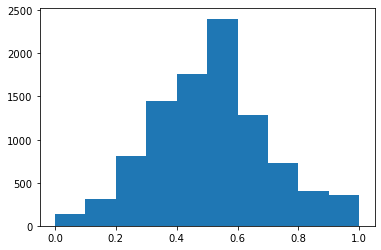

In [85]:
plt.hist(df['Age_sqaure'])

In [86]:
X= df.drop('Exited',axis=1)
y=df['Exited']

In [87]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_LabelEncoded,Age_sqaure,Age_Boxcox,Balance_Square
0,0.506410,0.545455,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,0.0,0.616324,0.656003,0.000000
1,0.482906,0.522727,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,0.0,0.594950,0.635649,0.577955
2,0.256410,0.545455,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,0.0,0.616324,0.656003,0.797720
3,0.677350,0.477273,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,0.0,0.551406,0.593744,0.000000
4,1.000000,0.568182,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,0.0,0.637445,0.675980,0.707281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.831197,0.477273,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0,1.0,0.551406,0.593744,0.000000
9996,0.286325,0.386364,1.0,0.228657,0.000000,1.0,1.0,0.508490,1.0,0.0,0.0,1.0,0.460829,0.504593,0.478181
9997,0.698718,0.409091,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0,0.0,0.483939,0.527602,0.000000
9998,0.833333,0.545455,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0,1.0,0.616324,0.656003,0.547016


In [88]:
print(y.value_counts())

0.0    7685
1.0    1952
Name: Exited, dtype: int64


In [89]:
#pip install -U imbalanced-learn --user

In [90]:
from imblearn.over_sampling import RandomOverSampler


# Assuming 'X' is the feature set and 'y' is the target variable

# Applying RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Display the resampled dataset
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_LabelEncoded,Age_sqaure,Age_Boxcox,Balance_Square,Exited
0,0.506410,0.545455,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,0.0,0.616324,0.656003,0.000000,1.0
1,0.482906,0.522727,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,0.0,0.594950,0.635649,0.577955,0.0
2,0.256410,0.545455,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,0.0,0.616324,0.656003,0.797720,1.0
3,0.677350,0.477273,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,0.0,0.551406,0.593744,0.000000,0.0
4,1.000000,0.568182,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,0.0,0.637445,0.675980,0.707281,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15365,0.824786,0.181818,0.5,0.203733,0.000000,1.0,1.0,0.352250,1.0,0.0,0.0,0.0,0.235828,0.270107,0.451368,1.0
15366,0.561966,0.295455,0.7,0.642379,0.333333,1.0,0.0,0.062948,1.0,0.0,0.0,1.0,0.364910,0.407046,0.801486,1.0
15367,1.000000,0.409091,0.5,0.478218,0.000000,1.0,0.0,0.957709,0.0,1.0,0.0,1.0,0.483939,0.527602,0.691533,1.0
15368,0.344017,0.681818,0.1,0.402157,0.000000,0.0,0.0,0.166512,0.0,1.0,0.0,1.0,0.739546,0.770718,0.634159,1.0


In [91]:
df_resampled['Exited'].value_counts()

0.0    7685
1.0    7685
Name: Exited, dtype: int64

In [92]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming 'X' is the feature set and 'y' is the target variable

# Applying SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the resampled dataset
df_smoteresampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_smoteresampled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_LabelEncoded,Age_sqaure,Age_Boxcox,Balance_Square,Exited
0,0.506410,0.545455,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,0.0,0.616324,0.656003,0.000000,1.0
1,0.482906,0.522727,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,0.0,0.594950,0.635649,0.577955,0.0
2,0.256410,0.545455,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,0.0,0.616324,0.656003,0.797720,1.0
3,0.677350,0.477273,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,0.0,0.551406,0.593744,0.000000,0.0
4,1.000000,0.568182,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,0.0,0.637445,0.675980,0.707281,0.0


In [93]:
df_smoteresampled['Exited'].value_counts()

0.0    7685
1.0    7685
Name: Exited, dtype: int64

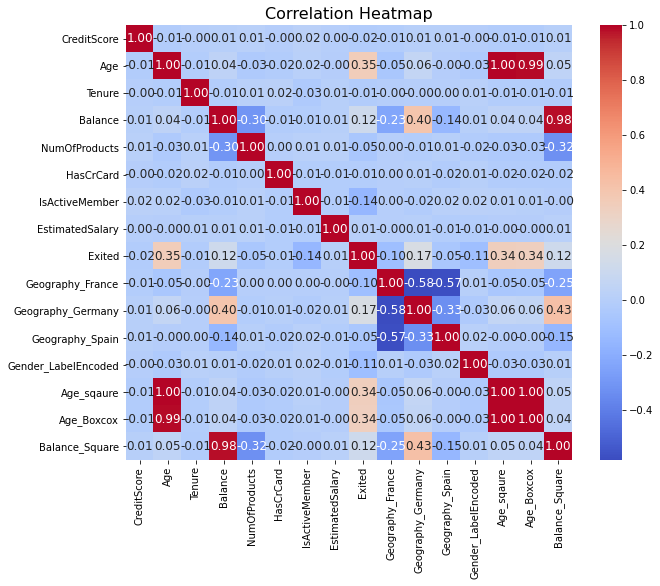

In [94]:
#to checck cat vs cat bivariate analysis
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


## separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [111]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [120]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [121]:
corr_features

{'Age_Boxcox', 'Age_sqaure', 'Balance_Square'}

In [122]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_LabelEncoded
5186,0.549145,0.318182,0.9,0.000000,0.333333,1.0,0.0,0.556697,1.0,0.0,0.0,1.0
4567,0.367521,0.204545,0.4,0.000000,0.333333,1.0,1.0,0.675425,0.0,0.0,1.0,0.0
2387,0.835470,0.477273,0.4,0.000000,0.333333,0.0,1.0,0.910436,0.0,0.0,1.0,0.0
4101,0.621795,0.886364,0.4,0.000000,0.333333,1.0,1.0,0.248386,0.0,0.0,1.0,0.0
3555,0.311966,0.409091,0.1,0.625546,0.000000,1.0,1.0,0.749575,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1375,0.100427,0.204545,0.6,0.467550,0.333333,1.0,1.0,0.120056,1.0,0.0,0.0,0.0
9717,0.801282,0.272727,0.3,0.579504,0.000000,0.0,1.0,0.991743,0.0,0.0,1.0,1.0
4398,0.771368,0.477273,0.8,0.000000,0.000000,1.0,0.0,0.471304,1.0,0.0,0.0,0.0
2665,0.491453,0.272727,0.9,0.569594,0.000000,1.0,0.0,0.529445,0.0,1.0,0.0,1.0
